In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [2]:
e = eval.evaluation(df_path= '819_aggregated_median.csv')
con = e.norm_agg()
res_enr = e.eval(con, operation = 'enrichment')
res_pre = e.eval(con, operation = 'precision_recall')
hit_ls = e.eval(con, operation = 'hit@k')
bins = np.arange(0,200,5)
h, bins = np.histogram(hit_ls[0], bins=bins)
hit = pd.DataFrame()
hit['bins'] = bins[:-1]
hit['h'] = h

1280 features were identified
running hit@k


In [3]:
res = pd.concat([res_enr, res_pre, hit], ignore_index=False, axis=1)
res.to_csv('819_results.csv', index=False)

In [4]:
hit_ls = e.eval(con, operation = 'hit@k')

running hit@k


In [27]:
res

,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall,bins,h
0,0.995,0.412806,12.950551,0.0,5.0,0.136842,0.003542,0,330
1,0.990,0.323585,9.071898,0.0,10.0,0.131579,0.006531,5,221
2,0.985,0.271684,7.297078,0.0,15.0,0.136842,0.009671,10,156
3,0.980,0.234874,6.039788,0.0,20.0,0.115789,0.011254,15,152
4,0.975,0.206420,5.270492,0.0,25.0,0.107368,0.012609,20,110
5,0.970,0.184470,4.775919,0.0,NaN,NaN,NaN,25,105
6,0.965,0.166648,4.282259,0.0,NaN,NaN,NaN,30,78
7,0.960,0.151423,3.887862,0.0,NaN,NaN,NaN,35,62
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,70
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,91


In [8]:
%matplotlib qt
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hit_ls[0], bins, alpha=0.6, color='blue', label='trained 817')
plt.hist(hit_ls[1], bins,alpha=0.4, color='red', label='randomized')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()


In [6]:
# compare to others
e = eval.evaluation(df_path= '../811/811_aggregated_median.csv')
con = e.norm_agg()
comp_enr = e.eval(con, operation = 'enrichment')
res_enr_baseline = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/res_enrichment_baseline.csv')

1280 features were identified


In [3]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

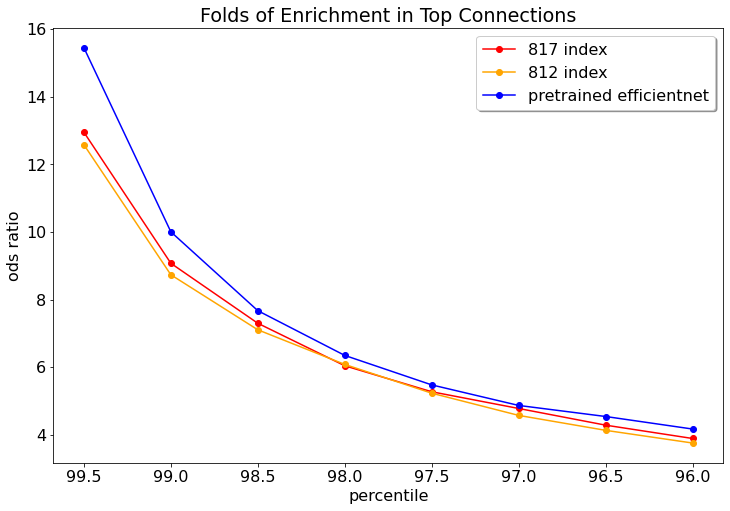

In [9]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_enr["enrichment_percentile"], res_enr["ods_ratio"], marker="o", color="red", label = '817 index')
plt.plot(100*comp_enr["enrichment_percentile"], comp_enr["ods_ratio"], marker="o", color="orange", label = '812 index')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [17]:
# how are 819 and 822 the same?

df19 = pd.read_csv('819_aggregated_median.csv')
df22 = pd.read_csv('../822/822_aggregated_median.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
features = [c for c in df19.columns if c.startswith('eff')]

In [ ]:
df19[features].subtract(df22[features])